In [3]:
import numpy as np
import pandas as pd

from sklearn.manifold import Isomap,locally_linear_embedding,spectral_embedding,MDS,TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist,pdist
import skbio
import sklearn.cluster as cluster
import hdbscan
import sklearn.preprocessing
from sklearn import metrics
from sklearn.decomposition import KernelPCA
from pyclustering.cluster import kmedians,kmedoids,cure
from scipy.cluster.hierarchy import dendrogram


# Data

In [4]:
# otudf =pd.read_csv(filepath_or_buffer="otudf",index_col=0)
wwfdf = pd.read_csv(filepath_or_buffer="wwfdf",encoding="ISO-8859-1",index_col = "ID")
wwfdfmin = pd.read_csv(filepath_or_buffer="wwfdfmin",encoding="ISO-8859-1",index_col = "ID")




# Black water sites. There are 21 black water sites and 143 white water
blackindex = wwfdf[wwfdf["Water"] == "Black"].index
# otudfCss =pd.read_csv(filepath_or_buffer="otudfCss",index_col=0)
# otudfMinCss =pd.read_csv(filepath_or_buffer="otudfMinCss",index_col=0)
# otudfLow = pd.read_csv(filepath_or_buffer="otudfLow",index_col=0)
# otudfCssLog = pd.read_csv(filepath_or_buffer="otudfCssLog",index_col=0)


# River dataset; everything that lives in the river
riverdf = pd.read_csv("riverdf",index_col=0)
riverdfCss = pd.read_csv("riverdfcss",index_col=0)
riverdfCssLog = pd.read_csv("riverdfcsslog",index_col=0)
riverdf100s = pd.read_csv("riverdf100s",index_col=0)
riverdf100sCss = pd.read_csv("riverdf100scss",index_col=0)
riverdf100sCssLog = pd.read_csv("riverdf100scsslog",index_col=0)
#rivindex =(riverdf.riverAssociated == "yes").values
river_s_ind = riverdf100s.index


# Full otu table
fullotudf = pd.read_csv("fullotudf",index_col=0)
fullotudfCss = pd.read_csv("fullotudfCss",index_col=0)
fullotudfCssLog = pd.read_csv("fullotudfCssLog",index_col=0)
fullotudf100s = pd.read_csv("fullotudf100s",index_col=0)
fullotudf100sCss = pd.read_csv("fullotudf100sCss",index_col=0)
fullotudf100sCssLog = pd.read_csv("fullotudf100sCssLog",index_col=0)
# indexof samples in fulotudf100s dataset
full_s_ind = fullotudf100s.index



#To test animals no in river we just invert the rivindex
# We also get the index of samples with non zero otu counts
# nonzero_invrivindex =otudf.loc[:,np.invert(rivindex)].sum(axis=1) !=0

wwfdfmin.Water =(wwfdfmin.Water =="White")*1
#Importing taxonomy
taxadf = pd.read_csv(filepath_or_buffer="taxadf",index_col=0)
# Splitting training and test data
# np.random.seed(11235)
# X_train,X_test,y_train,y_test = train_test_split(otudf.loc[:,rivindex],wwfdf.Water,test_size = 0.2)
# np.random.seed(11235)
# Xn_train,Xn_test,y_train,y_test = train_test_split(nmds20,wwfdf.Water,test_size = 0.2)

In [75]:
conditions_mid = ~(((wwfdf.Easting >200000)& (wwfdf.Easting <500000) ) & ((wwfdf.Northing >9450000)&(wwfdf.Northing <9600000)))
no_mid_index = wwfdf.index.isin(wwfdf[conditions_mid].index)

In [76]:
wwfdf[no_mid_index]

Unnamed: 0  Easting  Northing  \
ID                                      
1-S01A           1   375528   9362230   
1-S01B           2   375528   9362230   
1-S01C           3   375528   9362230   
1-S01D           4   375528   9362230   
1-S02A           5   406099   9397454   
...            ...      ...       ...   
3-S20d         160   661751   9691091   
3-S21a         161   628099   9739005   
3-S21b         162   628602   9739214   
3-S21c         163   628964   9739631   
3-S21d         164   629338   9740055   

                                                 Details  \
ID                                                         
1-S01A                                               NaN   
1-S01B                                               NaN   
1-S01C                                               NaN   
1-S01D                                               NaN   
1-S02A                                               NaN   
...                                                  ...   
3-S20d  Confluencia de quebrada y canal princ. Aguas neg   
3-S21a  Longitudinales, centro del cauce. Aguas blancas.   
3-S21b  Longitudinales, centro del cauce. Aguas blancas.   
3-S21c  Longitudinales, centro del cauce. Aguas blancas.   
3-S21d  Longitudinales, centro del cauce. Aguas blancas.   

                         River  Water  Trip     NM_ID Sampling_date  \
ID                                                                    
1-S01A                Huallaga  White     1  NMID3578     20-Jun-18   
1-S01B                Huallaga  White     1  NMID3579     20-Jun-18   
1-S01C                Huallaga  White     1  NMID3580     20-Jun-18   
1-S01D                Huallaga  White     1  NMID3581     20-Jun-18   
1-S02A                Huallaga  White     1  NMID3582     25-Jun-18   
...                        ...    ...   ...       ...           ...   
3-S20d           Tacsa Curaray  Black     3  NMID4187     28-Oct-18   
3-S21a  Luego de Quebrada Remo  White     3       NaN     28-Oct-18   
3-S21b  Luego de Quebrada Remo  White     3       NaN     28-Oct-18   
3-S21c  Luego de Quebrada Remo  White     3       NaN     28-Oct-18   
3-S21d  Luego de Quebrada Remo  White     3       NaN     28-Oct-18   

        Area_group Area_group_name  
ID                                  
1-S01A           2        Huallaga  
1-S01B           2        Huallaga  
1-S01C           2        Huallaga  
1-S01D           2        Huallaga  
1-S02A           2        Huallaga  
...            ...             ...  
3-S20d           7            Napo  
3-S21a           7            Napo  
3-S21b           7            Napo  
3-S21c           7            Napo  
3-S21d           7            Napo  

[136 rows x 11 columns]

In [244]:
resultdf = pd.DataFrame()


In [117]:
metrics.davies_bouldin_score(riverdfCssLog,wwfdf.Area_group_name)

2.9711224289013916

# Embeddings/ Dimensionality reduction

In [149]:
def plotembedding(X,title):
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = plt.get_cmap('tab10')
    color_pallette = [cmap(i) for i in np.linspace(0,1,10)]
    colors = [color_pallette[k] for k in wwfdf.Area_group]
    sns.set_style()
    sns.scatterplot(ax=ax,x=X[:,0],y=X[:,1],hue=wwfdf.Area_group_name.to_list(),style=wwfdf.Water.to_list())
#     ax.legend()
    plt.title(title)
    plt.show()

Isomap

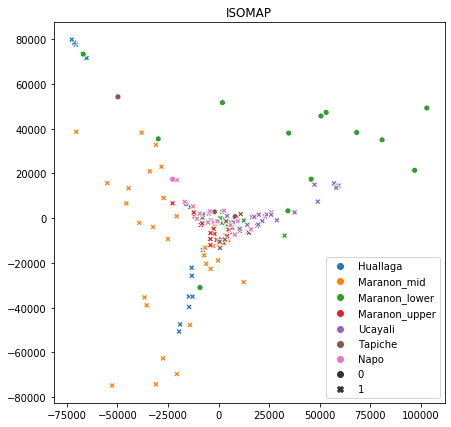

In [95]:
%matplotlib inline
isoembedding = Isomap(n_components=2)
X_transformed = isoembedding.fit_transform(riverdf)
plotembedding(X_transformed,"ISOMAP")

In [61]:
X_lle = locally_linear_embedding(riverdf,n_components=2,n_neighbors=1,method = 'ltsa')
print(X_lle[1])
plotembedding(X_lle[0])

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.18811303891975664 and the largest is 9.181057410853073.
  RuntimeWarning


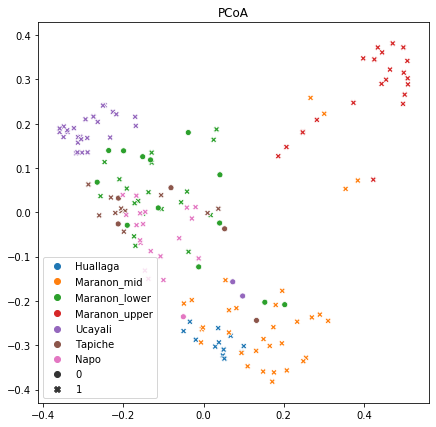

In [25]:
X_bray =cdist(riverdf,riverdf,metric = "braycurtis")
X_bio = skbio.stats.ordination.pcoa(X_bray)
plotembedding(X_bio.samples.to_numpy(),title= "PCoA")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


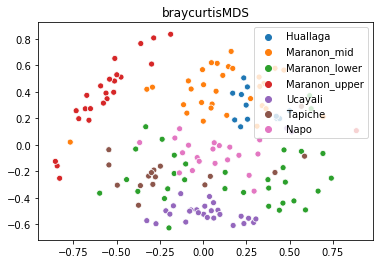

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.18811303891975664 and the largest is 9.181057410853073.
  RuntimeWarning


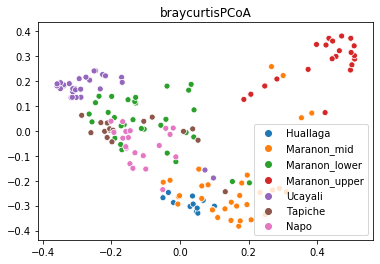

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


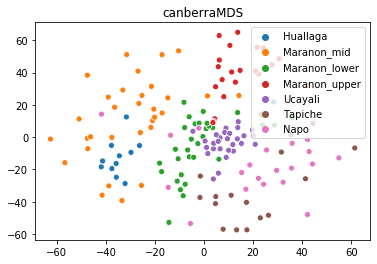

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -3637.419518906334 and the largest is 46524.79403669444.
  RuntimeWarning


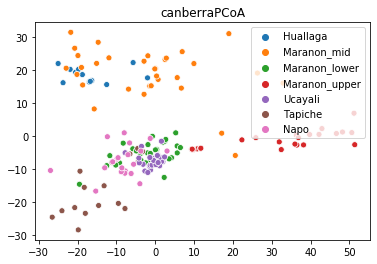

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


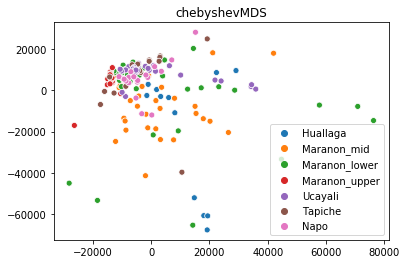

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -4767699959.056833 and the largest is 39295121490.847336.
  RuntimeWarning


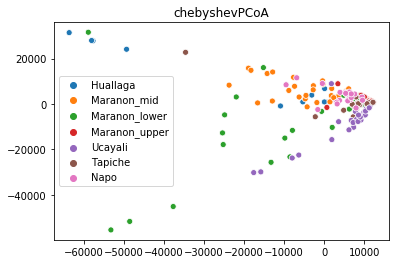

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


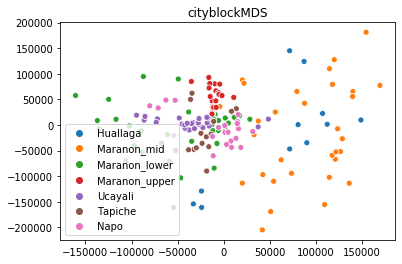

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -66479699848.38579 and the largest is 309987776469.9658.
  RuntimeWarning


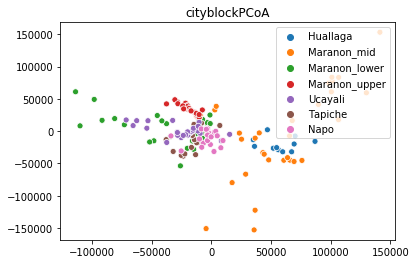

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


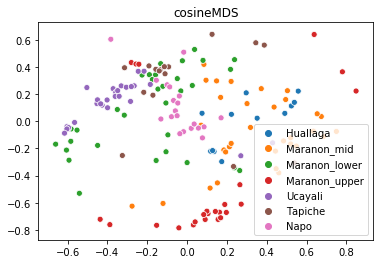

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


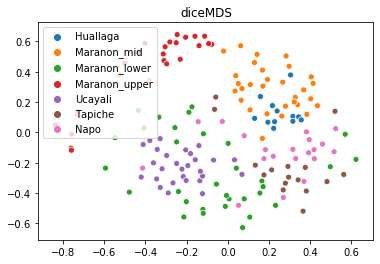

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.19507285117311501 and the largest is 7.414225537284715.
  RuntimeWarning


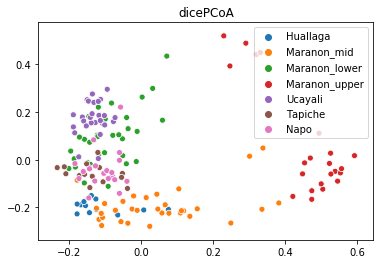

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


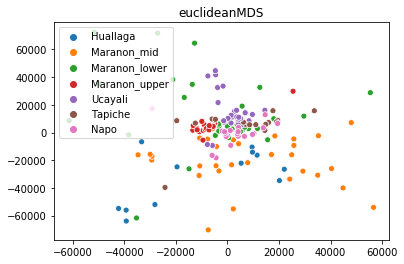

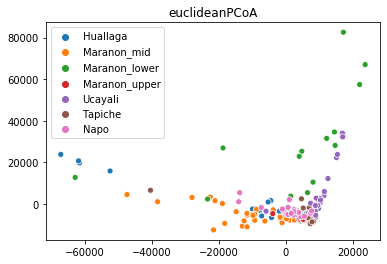

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


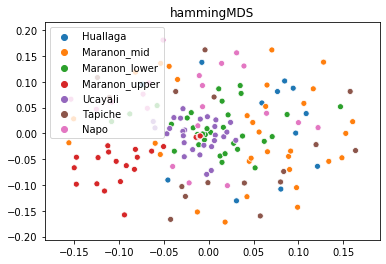

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.05773597105289556 and the largest is 0.21759775216572624.
  RuntimeWarning


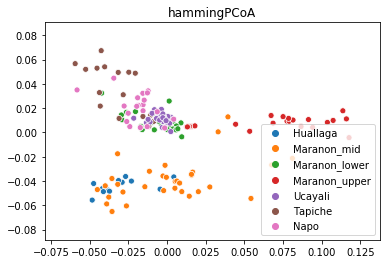

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


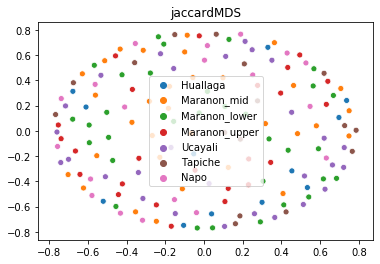

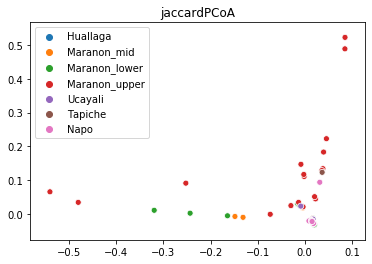

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


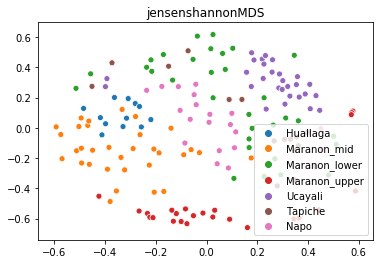

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


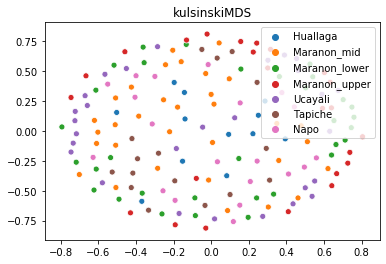

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


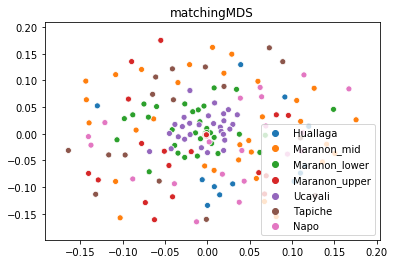

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.05773597105289556 and the largest is 0.21759775216572624.
  RuntimeWarning


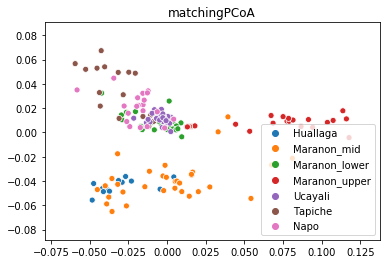

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


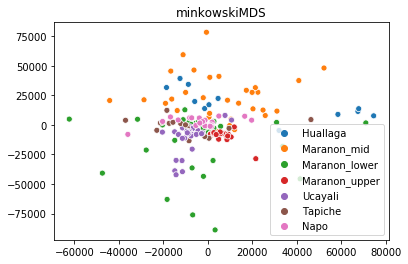

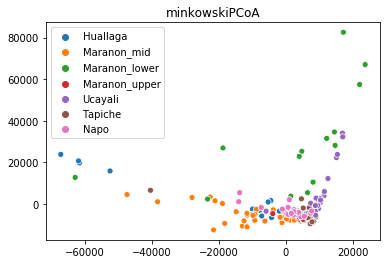

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


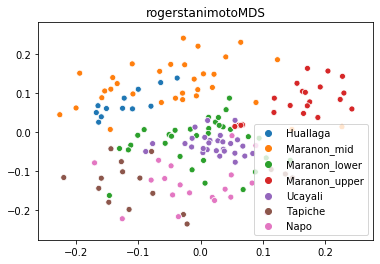

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.035476719307592344 and the largest is 0.8569773933263851.
  RuntimeWarning


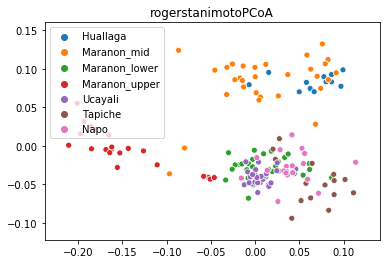

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


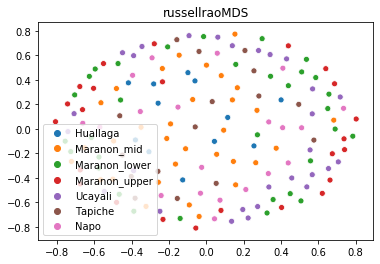

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


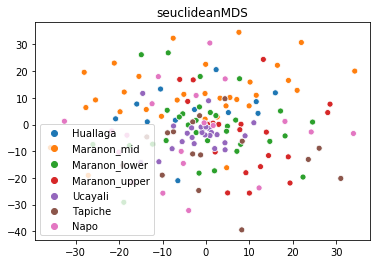

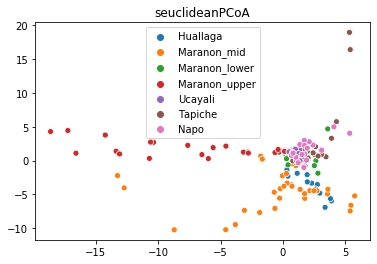

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


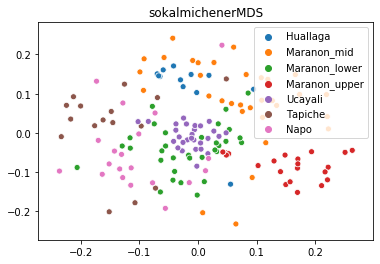

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.035476719307592344 and the largest is 0.8569773933263851.
  RuntimeWarning


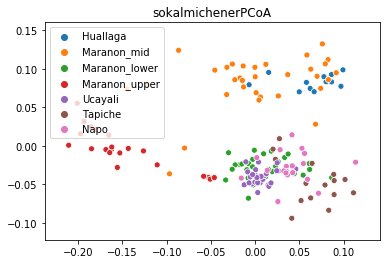

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


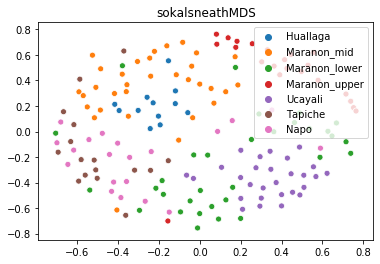

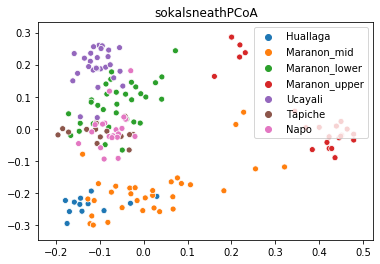

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


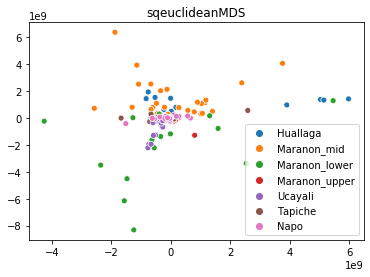

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.34014408398483e+20 and the largest is 3.747401979805314e+20.
  RuntimeWarning


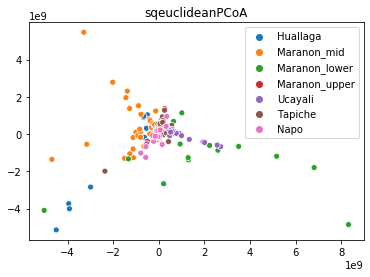

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


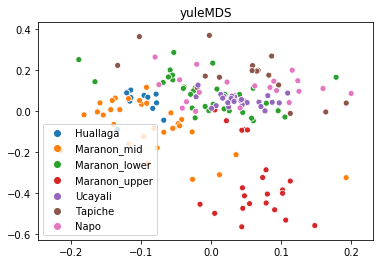

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -2.3185124927866143 and the largest is 7.521572008521219.
  RuntimeWarning


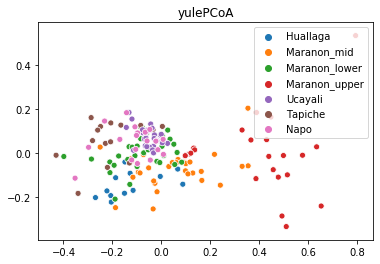

In [64]:
for i in ["braycurtis","canberra", "chebyshev", "cityblock", "cosine", "dice", "euclidean", 
          "hamming", "jaccard", "jensenshannon", "kulsinski", "matching", "minkowski", 
          "rogerstanimoto", "russellrao", "seuclidean", "sokalmichener", "sokalsneath", "sqeuclidean",
          "yule"]:
    
    X_bray =cdist(riverdf,riverdf,metric = i)
    MDSembedding = MDS(n_components=2,n_jobs =-1,dissimilarity='precomputed',metric= True,verbose=10)
    X_mds = MDSembedding.fit_transform(X_bray)
    plotembedding(X_mds,title = i+"MDS")

    try:
        X_bio = skbio.stats.ordination.pcoa(X_bray)
        plotembedding(X_bio.samples.to_numpy(),title= i+"PCoA")
    except Exception as DistanceMatrixError:
        pass


In [98]:
dist_tsne = ["braycurtis","canberra", "chebyshev", "cityblock", "cosine", "dice", "euclidean", 
          "hamming", "jaccard", "kulsinski", "matching", "minkowski", 
          "rogerstanimoto", "russellrao", "sokalmichener", "sokalsneath", "sqeuclidean",
          "yule"]

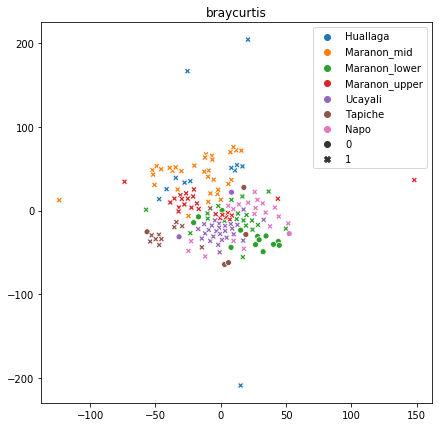

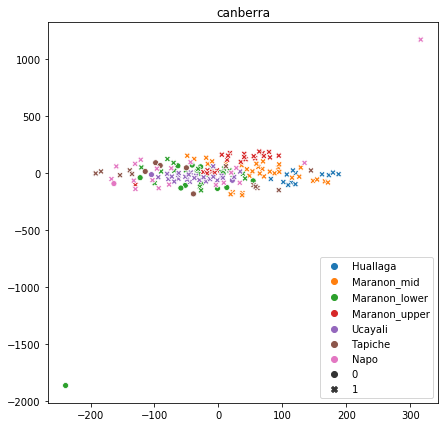

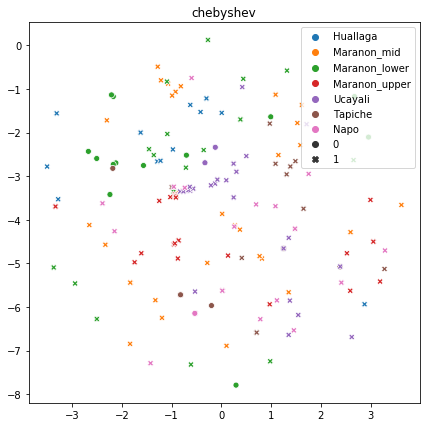

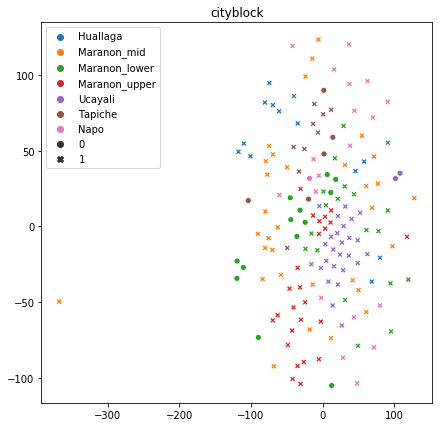

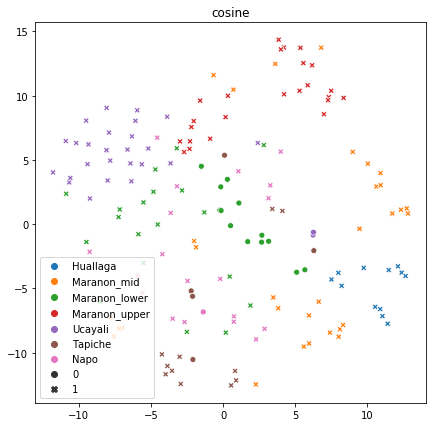

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


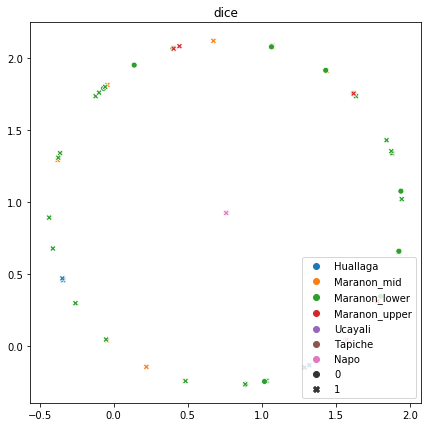

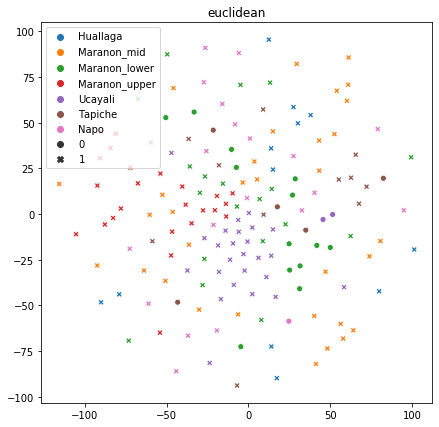

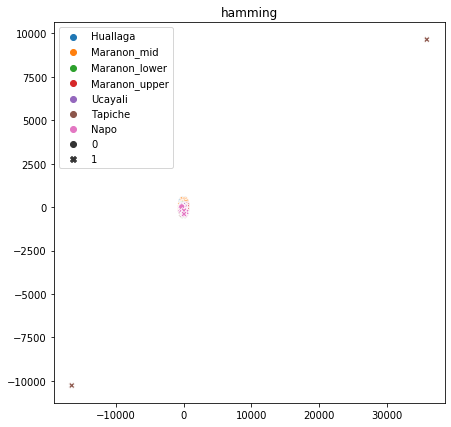

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


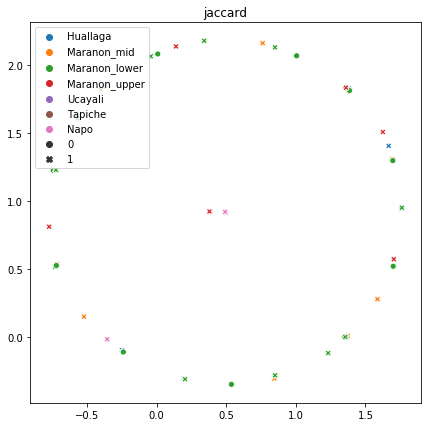

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


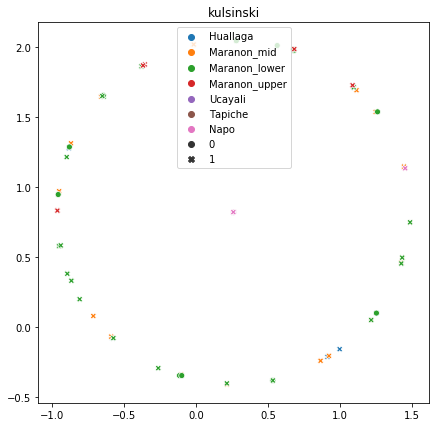

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


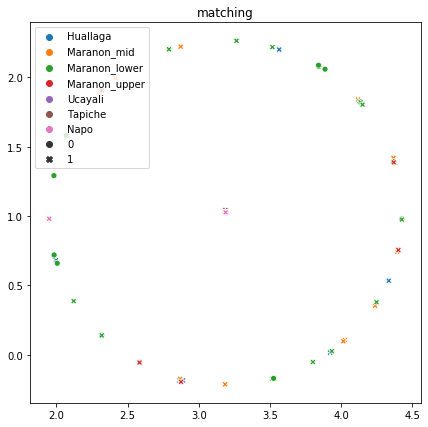

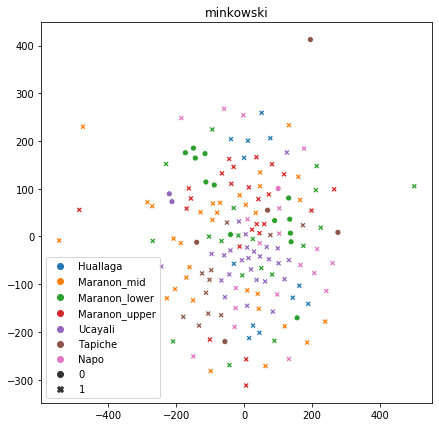

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


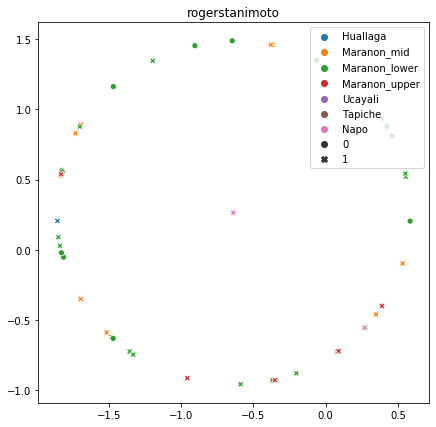

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)


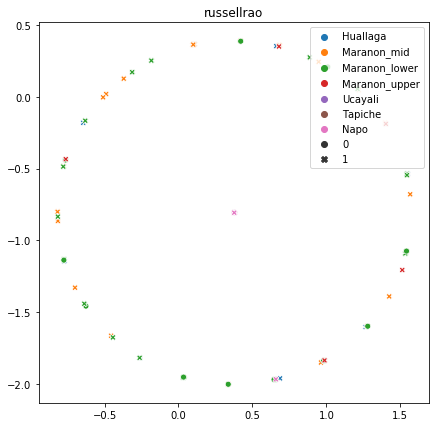

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


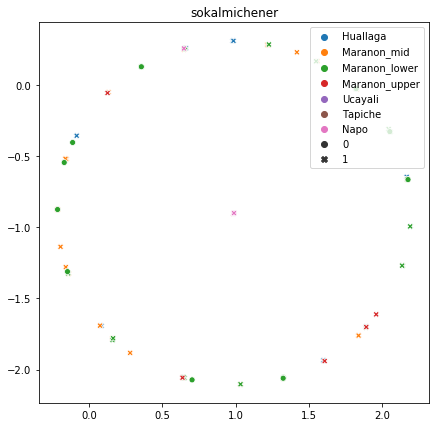

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


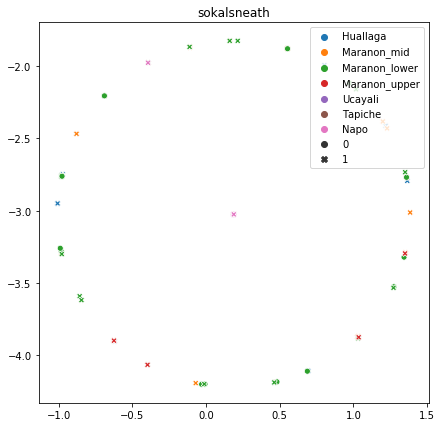

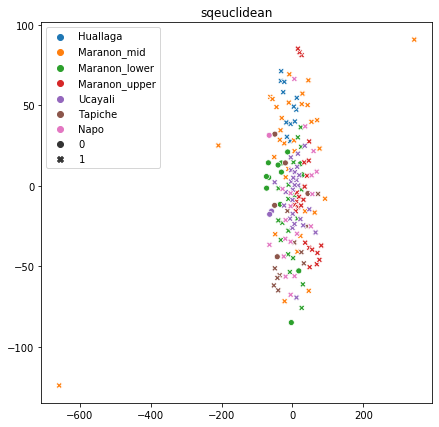

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)


AssertionError: All probabilities should be finite

In [99]:

for i in dist_tsne:
    
    X_tsne = TSNE(metric=i,perplexity=30).fit_transform(riverdf_sc)
    plotembedding(X_tsne,title=i)

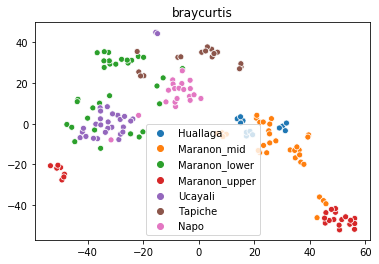

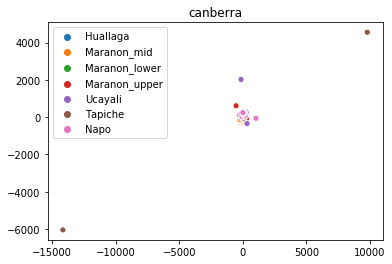

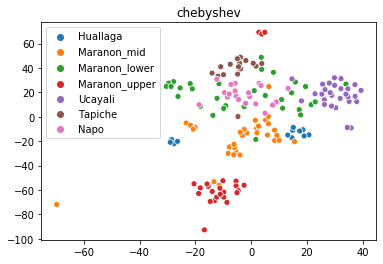

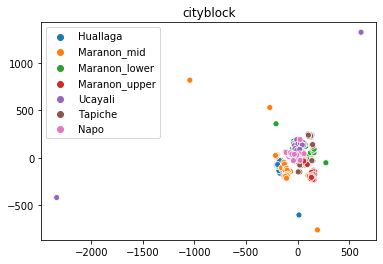

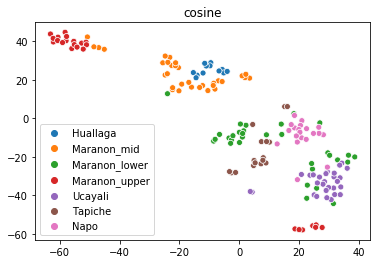

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


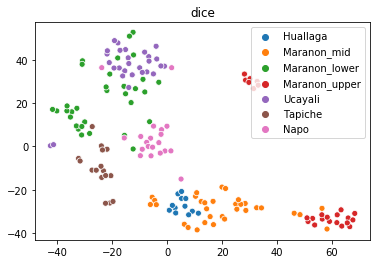

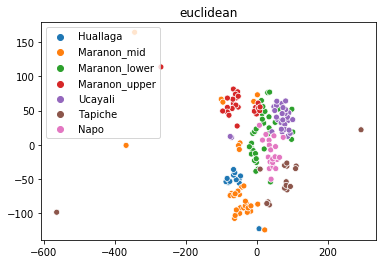

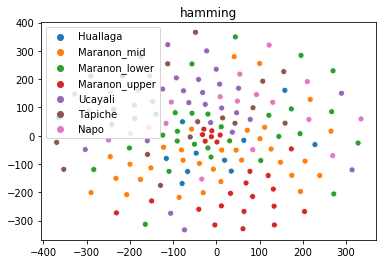

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


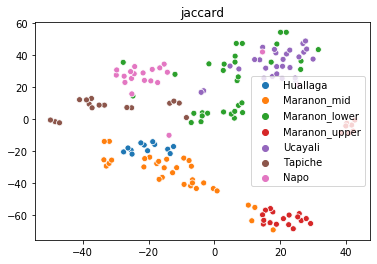

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


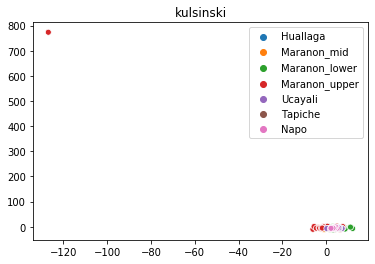

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


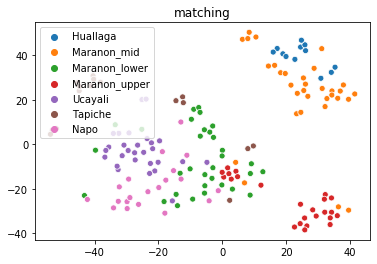

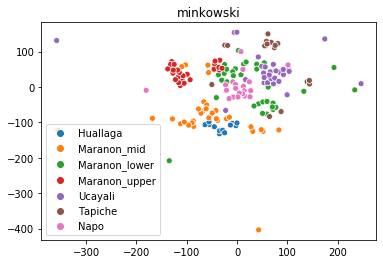

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


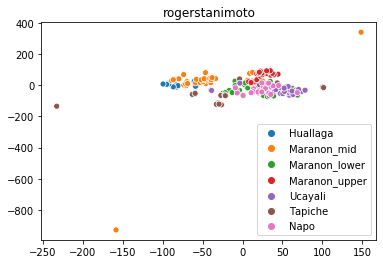

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)


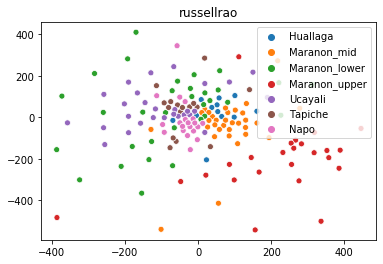

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


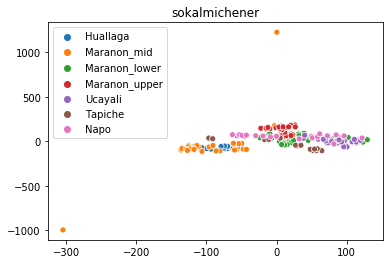

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


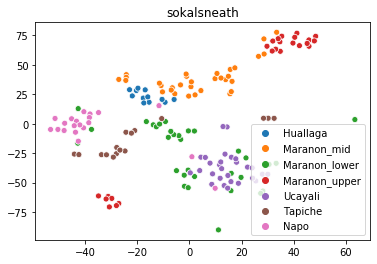

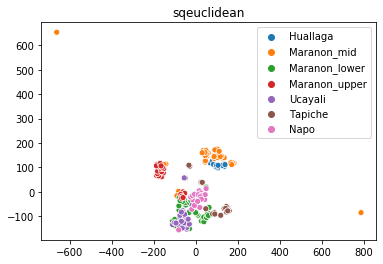

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)


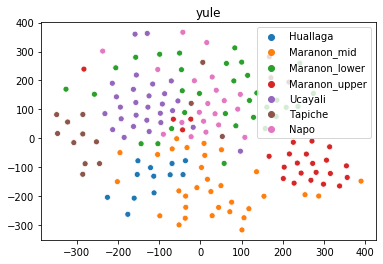

In [85]:
for i in dist_tsne:
    X_tsne = TSNE(metric=i,perplexity=10,method = "exact",n_iter=2000,learning_rate=300).fit_transform(riverdfCssLog)
    plotembedding(X_tsne,title=i)

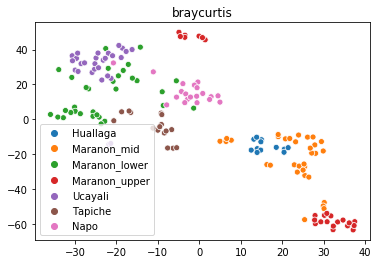

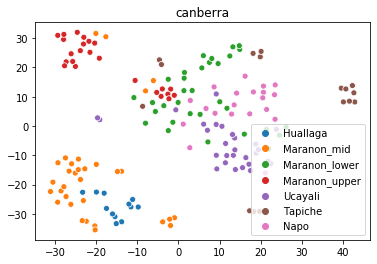

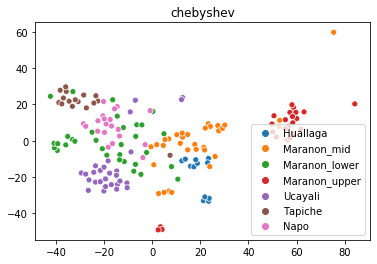

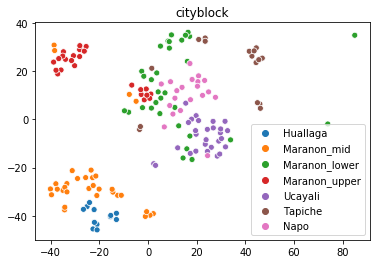

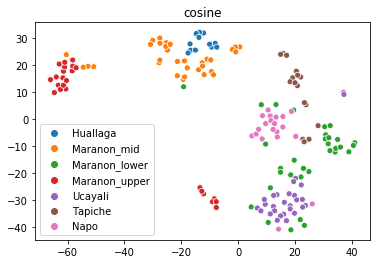

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


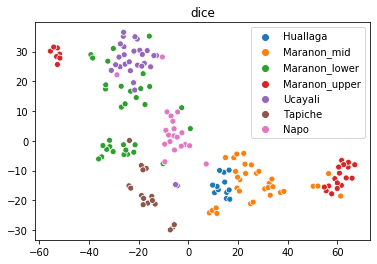

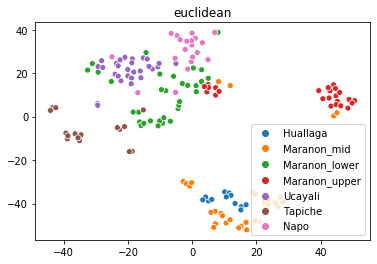

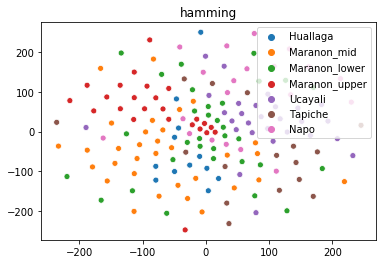

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


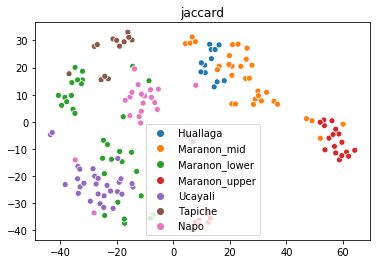

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


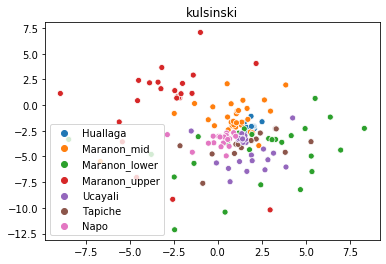

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


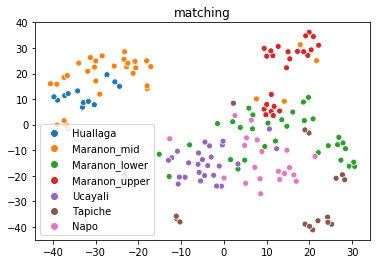

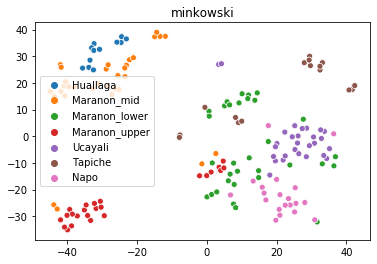

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


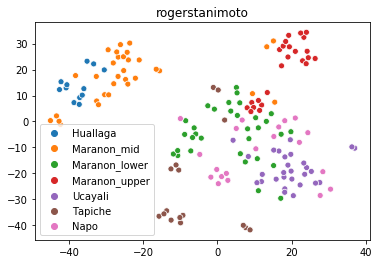

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)


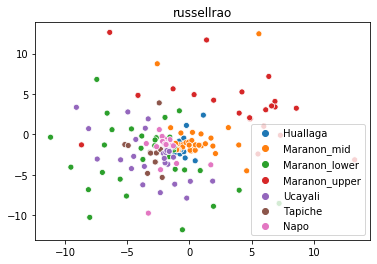

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


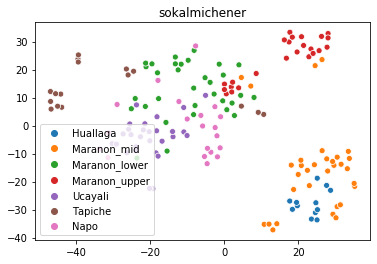

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


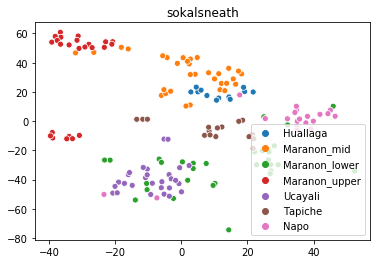

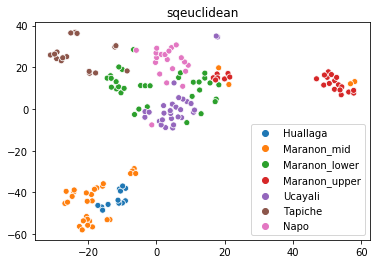

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)


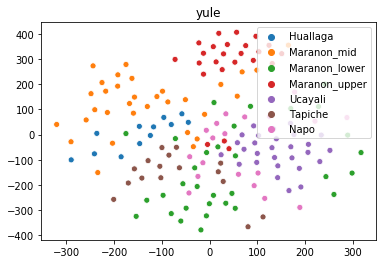

In [79]:
for i in dist_tsne:
    X_tsne = TSNE(metric=i,perplexity=10,method = "exact",n_iter=2000,learning_rate=100).fit_transform(riverdfCssLog)
    plotembedding(X_tsne,title=i)

Reduction of feature size

In [474]:

aggotu =cluster.FeatureAgglomeration(n_clusters=10).fit_transform(riverdfCssLog)

In [526]:
def braykernel(X,Y):
    
    matrix =cdist(X[None,:],Y[None,:],"braycurtis")+1e-2
    
    return(1/matrix)

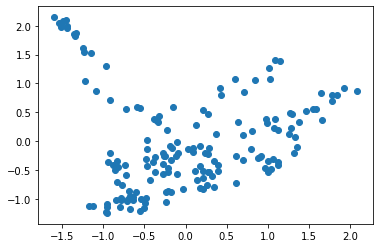

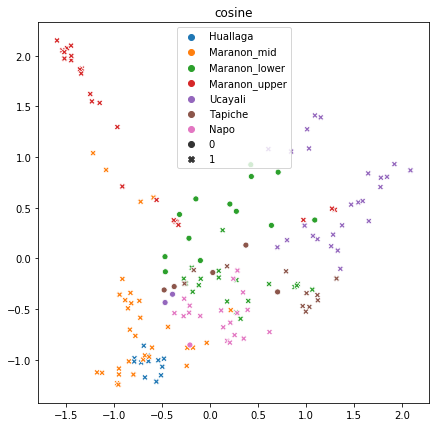

In [529]:
%matplotlib inline
#print(braykernel(riverdf,riverdf).max()     )
kpcaotu =KernelPCA(n_components=2,kernel = braykernel).fit_transform(riverdfCss)
plt.scatter(x = kpcaotu[:,0], y= kpcaotu[:,1])
plotembedding(kpcaotu,"cosine")
plt.show()

# Clustering

We are going to test several custerign algorithms. The challenge is what the input should be and the parameters of the clustering algortihm. For instance do we use the fullotu table or just the rivers. Furthermore do we scale or not? Do we perform dimensionality reduction before and if yes which one whith what metric. The combinations are too large to take all of them into consideration. We will start off with the datasets as they are with no preprocessing, and then use a dimensionality reduction technique using a handfull of metrics if clustering doesn't work out

In [12]:
def edge_colors():
    edgecolors = np.array([[1,0,0]]*164,dtype = float)
    edgecolors[wwfdf.Trip ==2] = [0,1,0]
    edgecolors[wwfdf.Trip ==3] =[0,0,1]
    return edgecolors

In [13]:
def add_jitter(arr):
    np.random.seed(1125)
    stdev = .02*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [14]:
def cluster_on_map(labels,metadata =wwfdf,title= "Clustering",**kwargs):
    plt.subplots(figsize = (7,7))
    X,Y = (add_jitter(metadata.Easting), add_jitter(metadata.Northing))
    edge_array = (edge_colors())
    if labels.min() == -1:
        palette = [(0,0,0)]+sns.color_palette("Set2", np.unique(labels).shape[0]-1)
        
        
    else:
        palette = sns.color_palette("Set2", np.unique(labels).shape[0])
    sns.scatterplot(x= X,y=Y,hue=labels,palette=palette,
                        style=metadata.Water,s=100+20*metadata.Trip,edgecolor=(0,0,0),linewidth = 0.5,
                   alpha = 0.8)
    plt.title(title)
    if kwargs.get("fname"):
        plt.savefig(fname ="docs/images/"+kwargs["fname"],dpi = 300 )

## K-means

0.5257745080980728
0.10959133321243399


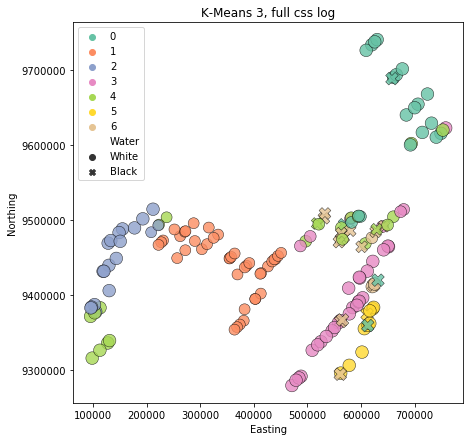

In [123]:
# X_dist = cdist(riverdfCssLog,riverdfCssLog,metric="braycurtis")
# X_bio = skbio.stats.ordination.pcoa(X_dist)

# kmeans =sklearn.cluster.KMeans(random_state=11235,n_jobs = -1,n_clusters=5).fit(X_bio.samples.to_numpy())
# kmeans =sklearn.cluster.KMeans(random_state=11235,n_jobs = -1,n_clusters=7).fit(fullotudfCssLog.loc[:,[i not in   riverdf.columns for i in fullotudfCssLog.columns]])
kmeans =sklearn.cluster.KMeans(random_state=11235,n_jobs = -1,n_clusters=7).fit((riverdfCssLog))
print(metrics.adjusted_rand_score(wwfdf.Area_group, kmeans.labels_))
print(metrics.silhouette_score(riverdfCssLog,kmeans.labels_))
cluster_on_map(kmeans.labels_,title="K-Means 3, full css log")#,fname = "kmeans_3fullcsslog.png")

In [124]:
print(metrics.davies_bouldin_score(riverdfCssLog,kmeans.labels_))


2.354284000826102


## K medians

In [11]:
def list_of_clusters_to_clusters(list_of_clusters,y = np.zeros(164,dtype=int)):
    for j,i in enumerate(list_of_clusters):
        y[i]=int(j)
    return y

225037.00827786102
225037.00827786102
225037.00827786102
225037.00827786102
192570.57036637378
192570.57036637378
192570.57036637378
192570.57036637378
192570.57036637378
192570.57036637378
190264.9286487571
190264.9286487571
190264.9286487571
190264.9286487571
190264.9286487571
190264.9286487571
190264.9286487571
190264.9286487571
190264.9286487571
190264.9286487571
190264.9286487571
0.33264336956624324


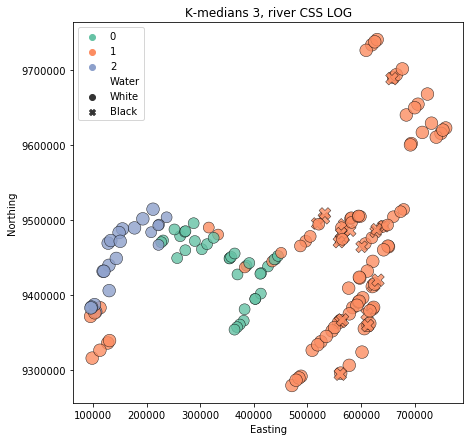

In [13]:
partitions = 3
np.random.seed(11235)
dataframe = riverdfCssLog
km_instance = kmedians.kmedians(((dataframe)*1).to_numpy(),dataframe.sample(n=partitions).to_numpy(),itermax = 100)
km_instance.process()
error =(km_instance.get_total_wce())
print(error)

for j in range(20):
    kmedoids_instance = kmedians.kmedians(((dataframe)*1).to_numpy(),dataframe.sample(n=partitions).to_numpy(),itermax = 100)
#     kmedoids_instance = kmedoids.kmedoids(((riverdfCssLog)*1).to_numpy(),np.random.randint(0,165,size=2),itermax = 10000)
    kmedoids_instance.process()
    new_error =(kmedoids_instance.get_total_wce())
    if new_error < error:
        km_instance = kmedoids_instance
        error = new_error
    print(error)
clusters =list_of_clusters_to_clusters(km_instance.get_clusters())
print(metrics.adjusted_rand_score(wwfdf.Trip,clusters))
cluster_on_map(clusters,title="K-medians {}, river CSS LOG".format(partitions),fname = "kmedians_{}fulldfcsslog.png".format(partitions))
    #plt.close()

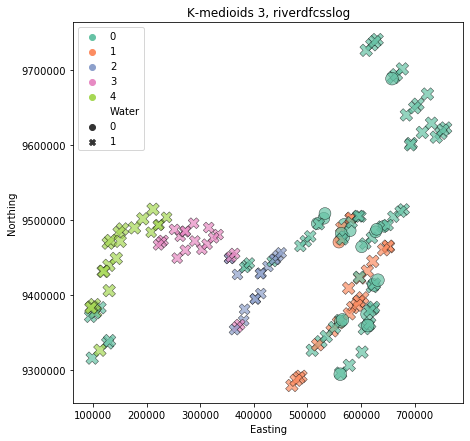

In [155]:
cluster_on_map(clusters,title="K-medioids 3, riverdfcsslog".format(j))#,fname = "kmedioids_3_csslog3.png".format(j))


## CURE

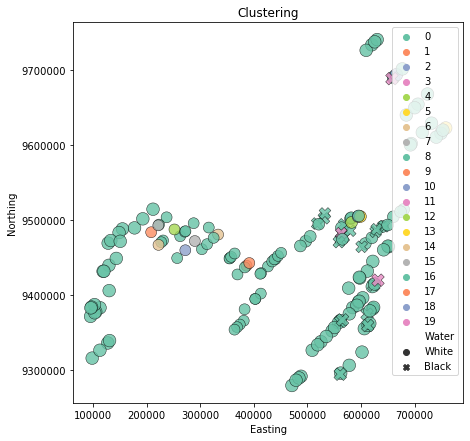

In [42]:
partitions = 20
np.random.seed(11235)
dataframe = sklearn.preprocessing.StandardScaler(with_mean=False).fit_transform([list(i)for i in riverdf.to_numpy()])
cure_instance = cure.cure(dataframe,partitions)
cure_instance.process()
cure_clusters = list_of_clusters_to_clusters(cure_instance.get_clusters())
cluster_on_map(cure_clusters)


## Affinity Propagation

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 6 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 3 3 5 0 0 0 2 5 5 2 5 2 2 6 5 5 2 5 5 5 2 5 2 2 2 2 6 2 2 5 5 6 5 5 2 2
 5 5 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 2 6 6 4 6 4 4 4
 4 4 4 4 4 4 4 4 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 2 5 5 5 6 5 2
 6 6 2 6 6 6 6 6 6 6 6 6 6 6 6 5]
0.42015827728116967


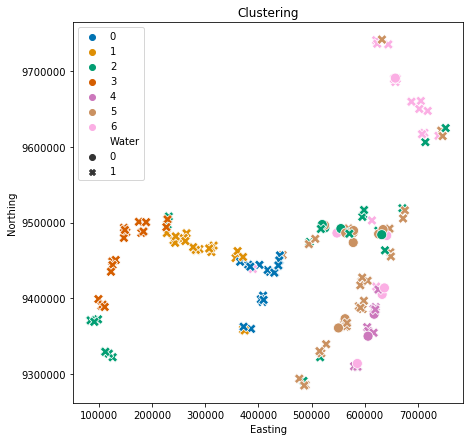

In [23]:
affinitylabels=sklearn.cluster.AffinityPropagation(preference=-7000,damping=0.6).fit_predict(riverdfCssLog)#X_bio.samples.to_numpy())
print(affinitylabels)
print(metrics.adjusted_rand_score(wwfdf.Area_group, affinitylabels))
cluster_on_map(affinitylabels)
#sns.scatterplot(x= wwfdf.Easting,y=wwfdf.Northing,hue=affinitylabels,palette=sns.color_palette("husl", affinitylabels.max()+1))

## Mean Shift doesnt seem to be working well for river and rivercsslog

In [43]:
Meanlabels = sklearn.cluster.MeanShift(cluster_all=True,n_jobs=-1,bandwidth=36).fit_predict(riverdfCssLog)

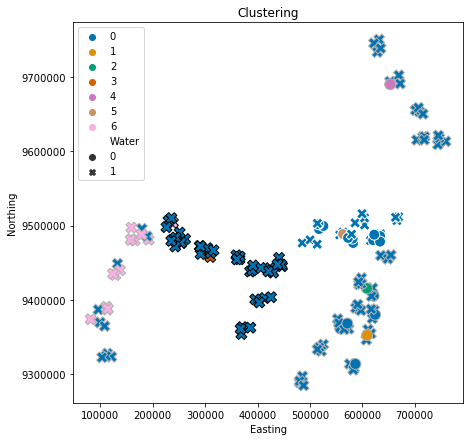

In [44]:
cluster_on_map(Meanlabels)

## Spectral Clustering

0.04920738949140952

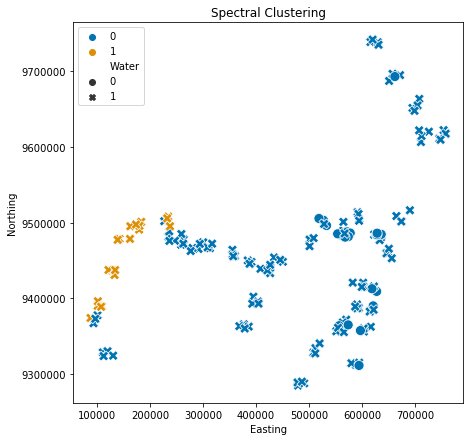

In [36]:
Slabels = sklearn.cluster.SpectralClustering(n_clusters=2,affinity="poly",degree=1).fit_predict((riverdfCssLog ))

# Slabels = sklearn.cluster.SpectralClustering(n_clusters=7,affinity="poly",degree=1).fit_predict(fullotudfCssLog)
# Slabels = sklearn.cluster.SpectralClustering(n_clusters=7,affinity="poly",degree=1).fit_predict(fullotudfCssLog.loc[:,[i not in   riverdf.columns for i in fullotudfCssLog.columns]])
cluster_on_map(Slabels,title="Spectral Clustering",fname = "speclust_2_csslog.png")
metrics.adjusted_rand_score(wwfdf.Area_group, Slabels)

## AgglomerativeClustering

/home/spanashis/anaconda2/envs/peru/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.07296379145323272 and the largest is 8.060626784596863.
  RuntimeWarning


0.1183086058313685

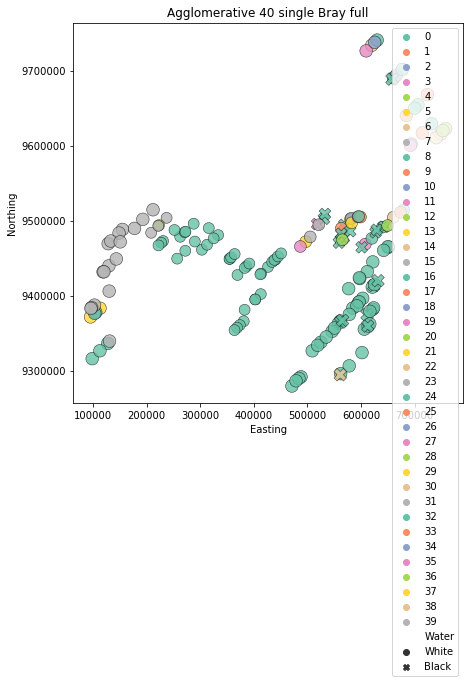

In [48]:
distance_matrix =cdist(fullotudfCssLog,fullotudfCssLog,metric = "braycurtis")
partitions = 40
# distance_matrix =  TSNE(metric="braycurtis",perplexity=10,method = "exact",n_iter=2000,learning_rate=200).fit_transform(riverdfCssLog)
dd =skbio.stats.ordination.pcoa(distance_matrix).samples
Agglabels=sklearn.cluster.AgglomerativeClustering(n_clusters=partitions,affinity="precomputed",linkage = "single").fit_predict(distance_matrix)#X_bio.samples)
cluster_on_map(Agglabels,title="Agglomerative {} single Bray full".format(partitions),fname="agg_{}singlebrayfull.png".format(partitions))
metrics.adjusted_rand_score(wwfdf.Area_group, Agglabels)

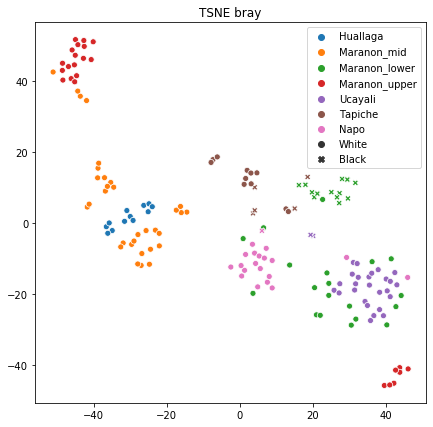

In [152]:
 plotembedding(TSNE(metric="braycurtis",perplexity=10,method = "exact",n_iter=2000,learning_rate=200).fit_transform(riverdfCssLog),title = "TSNE bray")

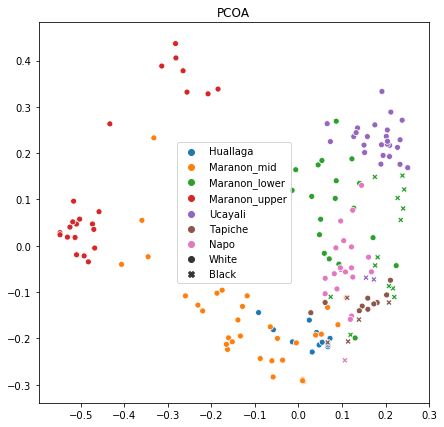

In [159]:
plotembedding(data.to_numpy(),title= "PCOA")

0.048283594147682324

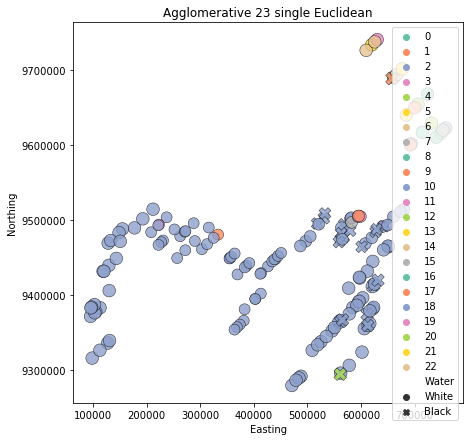

In [71]:
distance_matrix =cdist(fullotudfCssLog,fullotudfCssLog,metric = "braycurtis")
# distance_matrix =  TSNE(metric="braycurtis",perplexity=10,method = "exact",n_iter=2000,learning_rate=200).fit_transform(riverdfCssLog)
data =fullotudfCssLog#skbio.stats.ordination.pcoa(distance_matrix,number_of_dimensions=2).samples
partitions = 23
Agglabels=sklearn.cluster.AgglomerativeClustering(n_clusters=partitions,affinity="euclidean",linkage = "single").fit_predict(data)#X_bio.samples)
cluster_on_map(Agglabels,title="Agglomerative {} single Euclidean".format(partitions),fname = "agg_{}singleeuclideanfull.png".format(partitions))
metrics.adjusted_rand_score(wwfdf.Area_group, Agglabels)

/home/spanashis/anaconda2/envs/peru/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.07296379145323272 and the largest is 8.060626784596863.
  RuntimeWarning


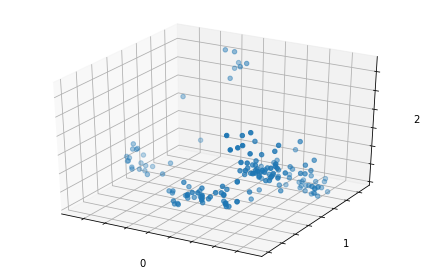

In [147]:
skbio.stats.ordination.pcoa(distance_matrix,number_of_dimensions=3)

In [119]:
print(metrics.davies_bouldin_score(riverdfCssLog,Agglabels))


1.771232204492837


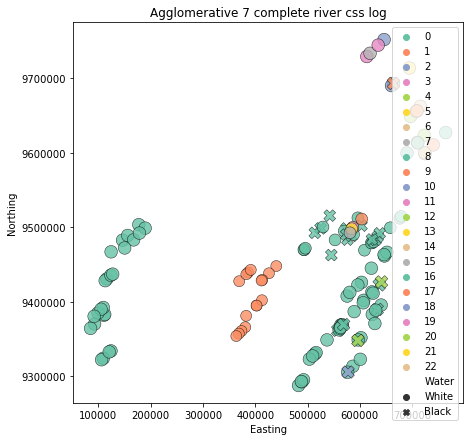

In [80]:
dataframeAgg = fullotudfCssLog[no_mid_index]#sklearn.preprocessing.StandardScaler(with_mean=False).fit_transform(riverdfCssLog)
# transformeddata =  TSNE(metric="canberra",perplexity=10,method = "exact",n_iter=2000,learning_rate=200).fit_transform(riverdfCssLog)
Agglabels=sklearn.cluster.AgglomerativeClustering(distance_threshold=None,n_clusters=23,linkage = "single",compute_full_tree=True).fit_predict(dataframeAgg)#X_bio.samples)
cluster_on_map(Agglabels,metadata=wwfdf[no_mid_index],title = "Agglomerative 7 complete river css log")#,fname = "agg_7ward_rivcss.png")
# print(metrics.adjusted_rand_score(wwfdf.Area_group, Agglabels))
# print(metrics.davies_bouldin_score(riverdfCssLog,Agglabels))

# print(metrics.silhouette_score(riverdfCssLog,Agglabels))

In [33]:
def get_distances(X,model,mode='l2'):
    distances = []
    weights = []
    children=model.children_
    dims = (X.shape[1],1)
    distCache = {}
    weightCache = {}
    for childs in children:
        c1 = X[childs[0]].reshape(dims)
        c2 = X[childs[1]].reshape(dims)
        c1Dist = 0
        c1W = 1
        c2Dist = 0
        c2W = 1
        if childs[0] in distCache.keys():
            c1Dist = distCache[childs[0]]
            c1W = weightCache[childs[0]]
        if childs[1] in distCache.keys():
            c2Dist = distCache[childs[1]]
            c2W = weightCache[childs[1]]
        d = np.linalg.norm(c1-c2)
        cc = ((c1W*c1)+(c2W*c2))/(c1W+c2W)

        X = np.vstack((X,cc.T))

        newChild_id = X.shape[0]-1

        # How to deal with a higher level cluster merge with lower distance:
        if mode=='l2':  # Increase the higher level cluster size suing an l2 norm
            added_dist = (c1Dist**2+c2Dist**2)**0.5 
            dNew = (d**2 + added_dist**2)**0.5
        elif mode == 'max':  # If the previrous clusters had higher distance, use that one
            dNew = max(d,c1Dist,c2Dist)
        elif mode == 'actual':  # Plot the actual distance.
            dNew = d


        wNew = (c1W + c2W)
        distCache[newChild_id] = dNew
        weightCache[newChild_id] = wNew

        distances.append(dNew)
        weights.append( wNew)
    return distances, weights

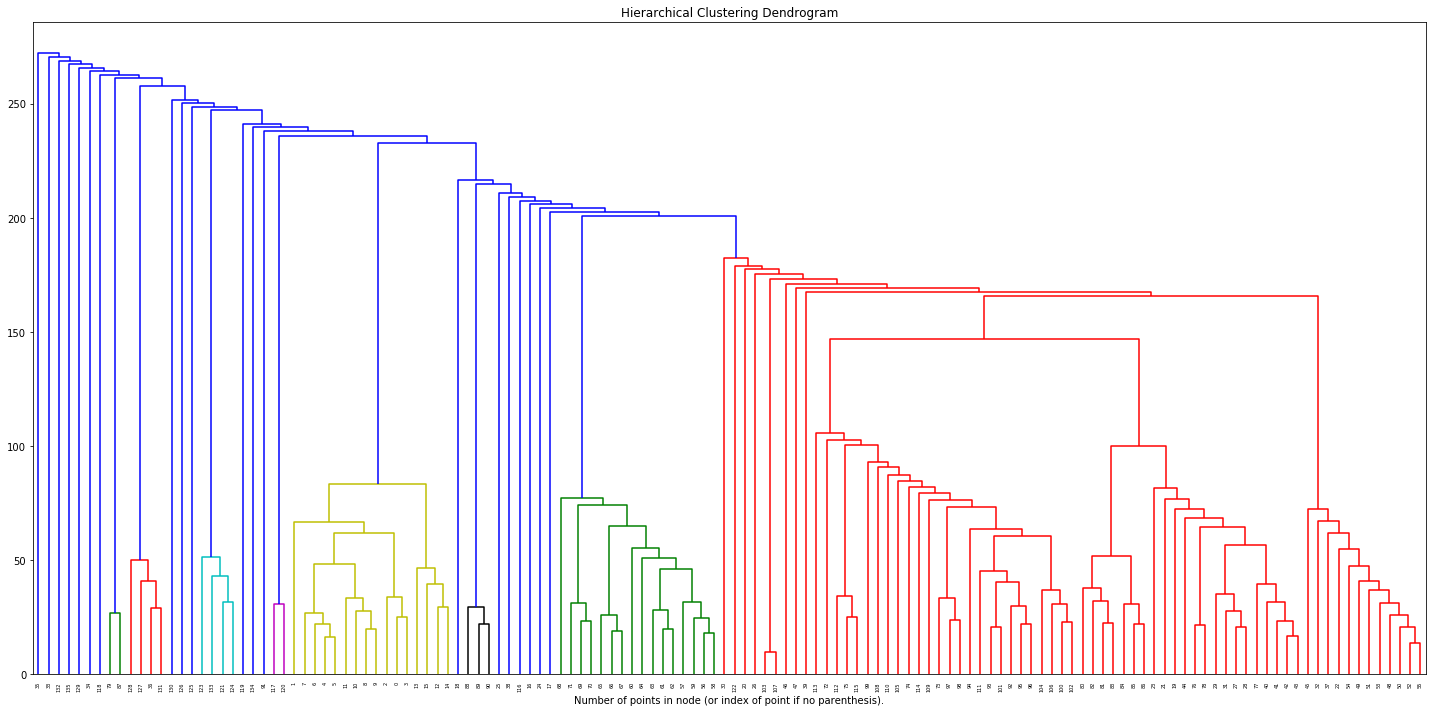

In [83]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = fullotudfCssLog[no_mid_index].to_numpy()
# setting distance_threshold=0 ensures we compute the full tree.
model = sklearn.cluster.AgglomerativeClustering(n_clusters=2,linkage = "single")

model = model.fit(X)
distance, weight = get_distances(X,model)
linkage_matrix = np.column_stack([model.children_, distance, weight]).astype(float)
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')

dendrogram(linkage_matrix)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.tight_layout()
plt.savefig("docs/images/dendro_singlefullcsslog.png",dpi = 200)
plt.show()


In [77]:
Agglabels

array([113,  92, 103, 106, 161, 132, 159, 154, 149,  93, 140, 150,  83,
       163, 105, 157, 148, 118, 139, 104, 121, 158, 115, 144,  84,  91,
       127, 160, 122, 147, 143, 130,  95, 110, 145,  86,  96, 107,  71,
        85, 124, 117, 128,  42,  73,  99, 109, 108, 162, 101,  45, 153,
       123,  58,  82, 146, 126, 141, 119, 142, 151, 135,  81,  69,  87,
        70, 114,  41,  52, 155,  79,  88,  74, 116, 129,  80,  76,  64,
        78,  54,  39, 138, 131, 152, 156, 120,  61,  75,  47,  36,  20,
       133, 111,  72,  37, 134, 102,  63,  53,  59,  50,  94,  26,  57,
        34,  98,  46, 100, 125,  66,  97,  43,  28, 136,  89,  77,  65,
        67, 112,  22,  31,  35,  51, 137,  68,  60,  48,  25,  32,  62,
        49,  40,  55,  24,  30,  17,  90,  56,  44,  21,  12,  38,  15,
        33,  18,   8,  29,  23,  27,  16,  10,   7,  14,  11,  13,   6,
        19,   9,   5,   4,   3,   1,   2,   0])

In [240]:
otu_clust = cluster.AgglomerativeClustering(compute_full_tree=True,n_clusters=10).fit_predict(riverdfCssLog.T)
metrics.adjusted_rand_score(taxadf.Class,otu_clust)

0.003146902683440146

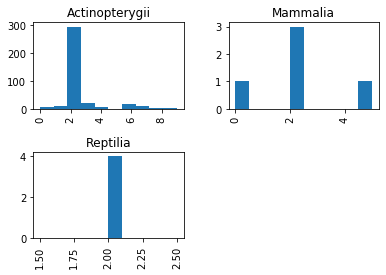

In [241]:
%matplotlib inline
pd.DataFrame({"clusters" : otu_clust},index=taxadf.index)["clusters"].hist(by= taxadf["Class"])
plt.show()

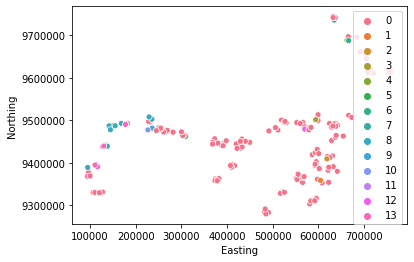

In [259]:
cluster_on_map(Meanlabels)

0.5360538601924564

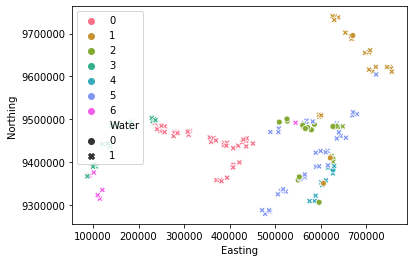

In [315]:
#X_dist = cdist(riverdfCssLog,riverdfCssLog,metric="jaccard")
#Agglabels=sklearn.cluster.AgglomerativeClustering(n_clusters=7,affinity="precomputed",linkage = "complete").fit_predict(X_dist)#X_bio.samples)
Agglabels=sklearn.cluster.AgglomerativeClustering(n_clusters=7,affinity="euclidean",linkage = "ward").fit_predict(riverdfCssLog)#X_bio.samples)
cluster_on_map(Agglabels)
metrics.adjusted_rand_score(wwfdf.Area_group, Agglabels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
  1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


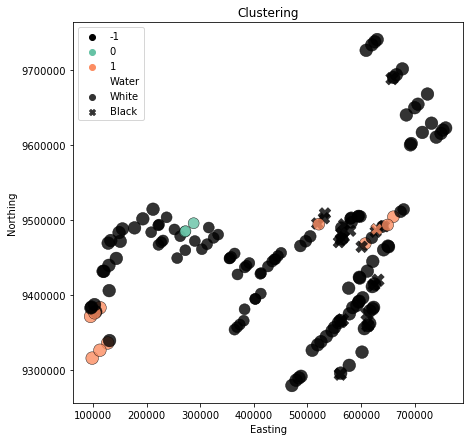

In [95]:
dataset = sklearn.preprocessing.StandardScaler(with_mean = False).fit_transform(riverdfCssLog)
dblabels = sklearn.cluster.DBSCAN(eps=10,metric = "euclidean",min_samples=2).fit_predict(dataset)
print(dblabels)

cluster_on_map(dblabels)

## HDBSCAN

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  1  1  0  0  0  0 -1  0  0  0
 -1 -1 -1 -1 -1  0  0  0  0  0  0  0 -1 -1  0 -1  0  0  0  0 -1  0  0  0
 -1  0  0  0 -1 -1 -1 -1  0  0  1  0  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1 -1  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


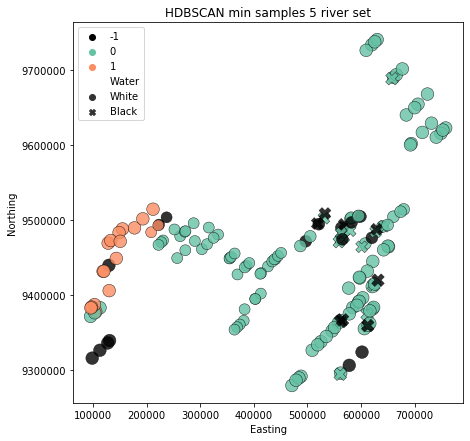

In [108]:
min_size = 5
dataset =riverdfCss# sklearn.preprocessing.StandardScaler(with_mean=False).fit_transform(riverdfCssLog)
hdlabels=hdbscan.HDBSCAN(min_cluster_size=min_size,metric="braycurtis").fit_predict(dataset)
print(hdlabels)

cluster_on_map(hdlabels,title="HDBSCAN min samples {} river set".format(min_size),fname = "hdbscan{}riverdf.png".format(min_size))

## Spectral Graph Clustering

In [15]:
from scipy.spatial.distance import pdist, squareform
def getAffinityMatrix(coordinates, k = 7):
    """
    Calculate affinity matrix based on input coordinates matrix and the numeber
    of nearest neighbours.
    
    Apply local scaling based on the k nearest neighbour
        References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    """
    # calculate euclidian distance matrix
    dists = squareform(pdist(coordinates)) 
    
    # for each row, sort the distances ascendingly and take the index of the 
    #k-th position (nearest neighbour)
    knn_distances = np.sort(dists, axis=0)[k]
    knn_distances = knn_distances[np.newaxis].T
    
    # calculate sigma_i * sigma_j
    local_scale = knn_distances.dot(knn_distances.T)

    affinity_matrix = dists * dists
    affinity_matrix = -affinity_matrix / local_scale
    # divide square distance matrix by local scale
    affinity_matrix[np.where(np.isnan(affinity_matrix))] = 0.0
    # apply exponential
    affinity_matrix = np.exp(affinity_matrix)
    np.fill_diagonal(affinity_matrix, 0)
    return affinity_matrix

In [16]:
import scipy
from scipy.sparse import csgraph
# from scipy.sparse.linalg import eigsh
from numpy import linalg as LA
def eigenDecomposition(A, plot = True, topK = 5):
    """
    :param A: Affinity matrix
    :param plot: plots the sorted eigen values for visual inspection
    :return A tuple containing:
    - the optimal number of clusters by eigengap heuristic
    - all eigen values
    - all eigen vectors
    
    This method performs the eigen decomposition on a given affinity matrix,
    following the steps recommended in the paper:
    1. Construct the normalized affinity matrix: L = D−1/2ADˆ −1/2.
    2. Find the eigenvalues and their associated eigen vectors
    3. Identify the maximum gap which corresponds to the number of clusters
    by eigengap heuristic
    
    References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5b0%5d.pdf
    """
    L = csgraph.laplacian(A, normed=True)
    n_components = A.shape[0]
    
    # LM parameter : Eigenvalues with largest magnitude (eigs, eigsh), that is, largest eigenvalues in 
    # the euclidean norm of complex numbers.
#     eigenvalues, eigenvectors = eigsh(L, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    eigenvalues, eigenvectors = LA.eig(L)
    
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
        plt.grid()
        
    # Identify the optimal number of clusters as the index corresponding
    # to the larger gap between eigen values
    index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters, eigenvalues, eigenvectors

Optimal number of clusters [30 13 24 46 35]


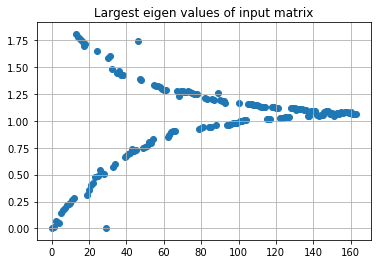

In [20]:
affinity_matrix = getAffinityMatrix(riverdf.to_numpy(), k = 1)
k, _,  _ = eigenDecomposition(affinity_matrix)
print(f'Optimal number of clusters {k}')